In [99]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

In [213]:
# y = f(x)
x = np.array([1,2,3,4,5,6,7,8,9])
x=x-4.5
#y = 1*np.power(x,3)-10*np.power(x,2)+5*np.power(x,1)+3 
#y = [math.sin(2*np.pi/9*i) for i in x]
#y = np.array(y)
y =  10*np.power(x,2)+2*x+1

In [187]:
#Method 1
A= np.array([[len(x) , np.sum(x) , np.sum(np.power(x,2))], [np.sum(x),  np.sum(np.power(x,2)),  np.sum(np.power(x,3))], [np.sum(np.power(x,2)),  np.sum(np.power(x,3)), np.sum(np.power(x,4))]])
C = np.expand_dims(np.array([np.sum(y), np.sum(x*y) , np.sum(np.power(x,2)*y) ]),1)
A = A.transpose()
ATA = np.matmul(A.transpose(), A)
ATC = np.matmul(A.transpose(), C)
w = np.matmul(np.linalg.inv(ATA), ATC)
print(w)

[[ 1.]
 [ 2.]
 [10.]]


In [196]:
#Method 2
A = np.array([np.power(x,0), np.power(x,1), np.power(x,2)]).transpose()
ATA = np.matmul(A.transpose(), A)
ATC = np.matmul(A.transpose(), y)
w = np.matmul(np.linalg.inv(ATA), ATC)
w=np.expand_dims(w,0)
print(w)

[[48.15746895  2.         10.        ]]


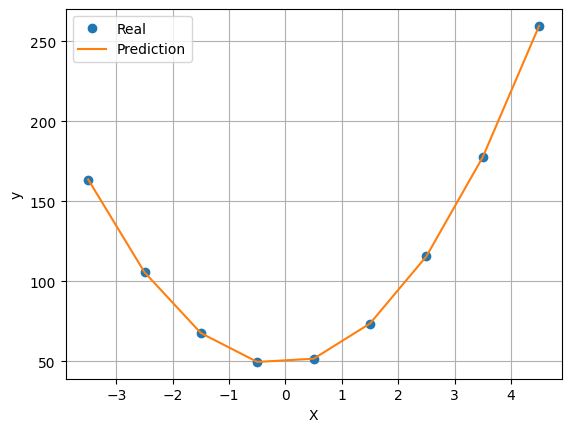

In [197]:
pred = np.power(x,2)*w[0,2]+np.power(x,1)*w[0,1]+w[0,0]
plt.plot(x,y, 'o',label='Real')
plt.plot(x,pred, label='Prediction' )
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

In [176]:
# n polynomial model
#Method 2
def get_w(x, y, n=4):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i][j] = np.sum(np.power(x,i+j))
    C = np.zeros((n, 1))
    for i in range(n):
        C[i][0] = np.sum(np.power(x,i)*y)
    A = A.transpose()
    ATA = np.matmul(A.transpose(), A)
    ATC = np.matmul(A.transpose(), C)
    w = np.matmul(np.linalg.inv(ATA), ATC).transpose()
    return w


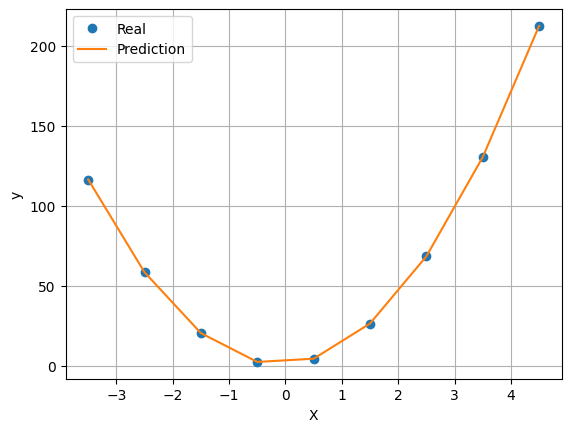

In [214]:
n=6
w = get_w(x , y, n)
for i in range(n):
    if i==0:
        pred = np.power(x,i)*w[0,i]
    else:
        pred += np.power(x,i)*w[0,i]
plt.plot(x,y, 'o',label='Real')
plt.plot(x,pred, label='Prediction' )
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.grid()